In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## [gene1, gene2, .., gene13, rRNA1, rRNA2]

## Reactions
# Productions
p1 = np.ones(15)
p1[12] = 0
p2 = np.zeros(15)
p2[12] = 1
v = [p1, p2]

# Degradation
d = []
for i in range(15):
    z = np.zeros(15)
    z[i] = -1
    d.append(z)
v += d

In [3]:
## Coefficient of Rates
p_rate = 100
d_rate_coef = 5

c = []
for i in range(2):
    c.append(p_rate)
for i in range(13):
    c.append(d_rate_coef)
for i in range(2):
    c.append(d_rate_coef / 3)

print(c)

[100, 100, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1.6666666666666667, 1.6666666666666667]


In [4]:
def Gillespie(t_max, x_ini, coef, reaction):
    t = 0
    t_list = [0]

    a = np.zeros(17)
    result = [x_ini]
    x = x_ini
    while t < t_max:
        # Propensity Function
        for i in range(2):
            a[i] = c[i]
        for i in range(2, 17):
            a[i] = c[i] * x[i - 2]
        a_sum = sum(a)
        
        # Next Reaction Index
        r1 = random.random()    
        a_sum1 = 0
        for j in range(17):
            a_sum1 += a[j]
            if a_sum1 / a_sum > r1:
                break
        x = x + v[j]
        result.append(x)
        
        # Time until next reaction
        r2 = random.random()
        tau = np.log(1 / r2) / a_sum
        t += tau
        t_list.append(t)
        
    return(t_list, result)

In [5]:
def index(t, t_list):
    ind, = np.where(t_list == t)
    if ind.size == 0:
        t_list = np.sort(np.append(t_list, t))
        ind, = np.where(t_list == t)
    return(ind[0])

In [19]:
def trans(t_list, result, t_max, count):
    flag = 0
    time = np.linspace(0, t_max, count)
    tr_result = []
    
    for t in time:
        while t_list[flag] <= t:
            flag += 1
        tr_result.append(result[flag - 1])
    
    return(np.array(tr_result))

In [66]:
iter = 1000
t_limit = 20
results = []
for i in range(iter):
    t_list, result = Gillespie(t_max = t_limit, x_ini = np.zeros(15), coef = c, reaction = v)
    results.append(trans(t_list, result, t_max = t_limit, count = 10000))
results = np.array(results)

In [112]:
results.shape

(1000, 10000, 15)

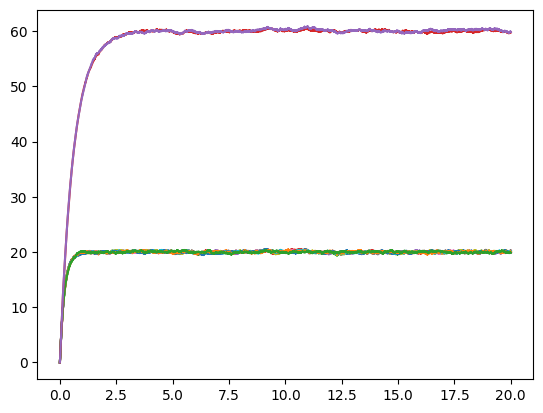

In [102]:
time = np.linspace(0, t_limit, 10000)
for i in range(15):
    plt.plot(time, [np.average(data) for data in np.transpose(results, (2, 1, 0))[i]])
plt.show()

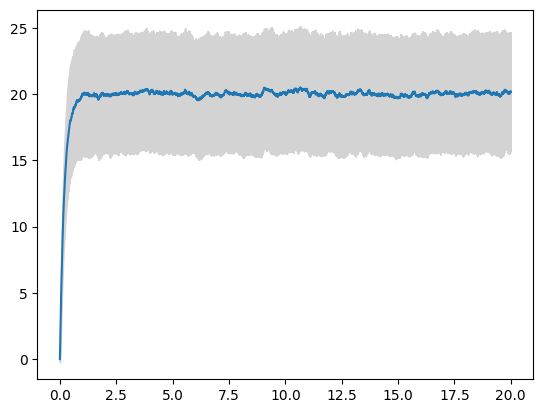

In [110]:
i = 1
p = 1
plt.plot(time, [np.average(data) for data in np.transpose(results, (2, 1, 0))[i]])
plt.fill_between(
    time, 
    [np.average(data) + p * np.std(data) for data in np.transpose(results, (2, 1, 0))[i]], 
    [np.average(data) - p * np.std(data) for data in np.transpose(results, (2, 1, 0))[i]], 
    color = 'lightgray'
)
plt.show()

In [111]:
np.average(np.transpose(results, (2, 1, 0))[i][2000:10000])

20.02929725

In [107]:
np.average(np.array([np.std(data) for data in np.transpose(results, (2, 1, 0))[i]][2000:10000]))

4.470244061325789

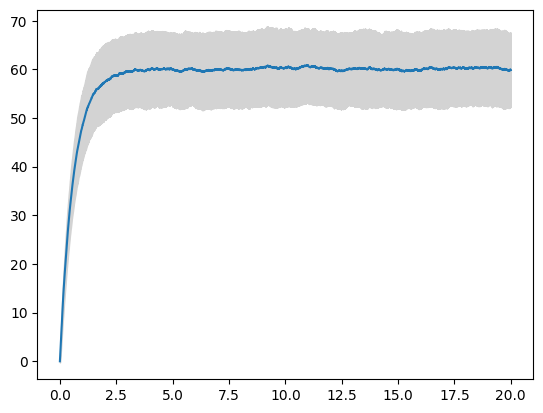

In [108]:
i = 14
p = 1
plt.plot(time, [np.average(data) for data in np.transpose(results, (2, 1, 0))[i]])
plt.fill_between(
    time, 
    [np.average(data) + p * np.std(data) for data in np.transpose(results, (2, 1, 0))[i]], 
    [np.average(data) - p * np.std(data) for data in np.transpose(results, (2, 1, 0))[i]], 
    color = 'lightgray'
)
plt.show()